# 데이터분석 팀프로젝트
## - 수면장애(Sleep Disorder)에 영향을 끼치는 요인에 대한 분석
- 요인 : 성별, 나이, 수면시간, 수면의질, 신체활동수준, 스트레스수준, 비만도, 혈압, 심박수, 걸음수

 <div style="text-align: right; font-size:20px;">
    - 진수영　　　　
</div>

### 전처리

In [1]:
import pandas as pd

sleep = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [2]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [3]:
sleep['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

<span style="background-color:#fff5b1">Sleep Disorder - 원핫인코딩</span>

In [4]:
y = sleep[['Sleep Disorder']]

In [5]:
onehot_y = pd.get_dummies(y['Sleep Disorder'])
y = pd.concat([y, onehot_y], axis=1)

y.drop(['Sleep Disorder'], axis=1, inplace=True)
y.head()

,Insomnia,None,Sleep Apnea
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


In [6]:
y_np = y.to_numpy()
y_np

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

<span style="background-color:#fff5b1">Person ID, Occupation열은 관련이없다 생각하여 제외하고 x정의</span>

In [7]:
x = sleep[['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Blood Pressure','Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps']]

<span style="background-color:#fff5b1">BMI, Gender 원핫인코딩</span>

In [8]:
onehot_BMI = pd.get_dummies(x['BMI Category'])
x = pd.concat([x, onehot_BMI], axis=1)

onehot_Gender = pd.get_dummies(x['Gender'])
x = pd.concat([x, onehot_Gender], axis=1)

x.drop(['BMI Category', 'Gender'], axis=1, inplace=True)
x.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Blood Pressure,Stress Level,Heart Rate,Daily Steps,Normal,Normal Weight,Obese,Overweight,Female,Male
0,27,6.1,6,42,126/83,6,77,4200,0,0,0,1,0,1
1,28,6.2,6,60,125/80,8,75,10000,1,0,0,0,0,1
2,28,6.2,6,60,125/80,8,75,10000,1,0,0,0,0,1
3,28,5.9,4,30,140/90,8,85,3000,0,0,1,0,0,1
4,28,5.9,4,30,140/90,8,85,3000,0,0,1,0,0,1


In [9]:
x_np = x.to_numpy()
x_np

array([[27, 6.1, 6, ..., 1, 0, 1],
       [28, 6.2, 6, ..., 0, 0, 1],
       [28, 6.2, 6, ..., 0, 0, 1],
       ...,
       [59, 8.1, 9, ..., 1, 1, 0],
       [59, 8.1, 9, ..., 1, 1, 0],
       [59, 8.1, 9, ..., 1, 1, 0]], dtype=object)

<span style="background-color:#fff5b1">Blood Pressure에서 수축기혈압만 남기기</span>

In [10]:
for i in range(len(x_np)) :
    for j in range(len(x_np[0])) :
        if j == 4 :
            a,b = x_np[i][j].split('/')
            x_np[i][j] = int(a)

<span style="background-color:#fff5b1">학습과 테이터세트 분리</span>

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, random_state=42)

<hr>

### - KNN 회귀

In [12]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train, y_train)

print('훈련결과 : ', kn.score(x_train, y_train))
print('테스트결과 : ', kn.score(x_test, y_test))

훈련결과 :  0.9071428571428571
테스트결과 :  0.8829787234042553


### - KNN회귀_Scale

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

In [14]:
x_train[:5]

array([[44, 6.3, 6, 45, 130, 7, 72, 6000, 0, 0, 0, 1, 0, 1],
       [44, 6.3, 6, 45, 130, 7, 72, 6000, 0, 0, 0, 1, 0, 1],
       [38, 7.1, 8, 60, 130, 5, 68, 8000, 1, 0, 0, 0, 0, 1],
       [29, 6.0, 6, 30, 120, 8, 70, 8000, 1, 0, 0, 0, 0, 1],
       [44, 6.3, 6, 45, 130, 7, 72, 6000, 0, 0, 0, 1, 0, 1]], dtype=object)

In [15]:
train_scaled[:5]

array([[ 0.17265472, -1.08260812, -1.15283871, -0.73085692,  0.1869272 ,
         0.96057491,  0.47516158, -0.55224501, -1.02899151, -0.24618298,
        -0.14797909,  1.20670641, -1.04381619,  1.04381619],
       [ 0.17265472, -1.08260812, -1.15283871, -0.73085692,  0.1869272 ,
         0.96057491,  0.47516158, -0.55224501, -1.02899151, -0.24618298,
        -0.14797909,  1.20670641, -1.04381619,  1.04381619],
       [-0.53653825, -0.06325453,  0.55056413, -0.00995531,  0.1869272 ,
        -0.1766808 , -0.50853707,  0.69980845,  0.97182532, -0.24618298,
        -0.14797909, -0.82870199, -1.04381619,  1.04381619],
       [-1.6003277 , -1.46486572, -1.15283871, -1.45175853, -1.08964879,
         1.52920276, -0.01668775,  0.69980845,  0.97182532, -0.24618298,
        -0.14797909, -0.82870199, -1.04381619,  1.04381619],
       [ 0.17265472, -1.08260812, -1.15283871, -0.73085692,  0.1869272 ,
         0.96057491,  0.47516158, -0.55224501, -1.02899151, -0.24618298,
        -0.14797909,  1.20

In [16]:
test_scaled[:5]

array([[ 1.23644416,  1.72061425,  1.40226556, -1.45175853, -0.4513608 ,
        -1.31393651, -1.24631107, -1.17827174,  0.97182532, -0.24618298,
        -0.14797909, -0.82870199,  0.95802308, -0.95802308],
       [-1.36393004, -1.33744652, -1.15283871, -1.45175853, -0.4513608 ,
         1.52920276,  0.47516158, -1.17827174,  0.97182532, -0.24618298,
        -0.14797909, -0.82870199, -1.04381619,  1.04381619],
       [-1.6003277 , -1.46486572, -1.15283871, -1.45175853, -1.08964879,
         1.52920276, -0.01668775,  0.69980845,  0.97182532, -0.24618298,
        -0.14797909, -0.82870199, -1.04381619,  1.04381619],
       [ 1.23644416,  1.72061425,  1.40226556, -1.45175853, -0.4513608 ,
        -1.31393651, -1.24631107, -1.17827174,  0.97182532, -0.24618298,
        -0.14797909, -0.82870199,  0.95802308, -0.95802308],
       [-1.24573122, -1.46486572, -1.15283871, -1.45175853, -0.4513608 ,
         1.52920276,  0.47516158, -1.17827174,  0.97182532, -0.24618298,
        -0.14797909, -0.82

In [17]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, y_train)

print('훈련결과 : ',kn.score(train_scaled, y_train))
print('테스트결과 : ',kn.score(test_scaled, y_test))

훈련결과 :  0.9142857142857143
테스트결과 :  0.8829787234042553


<hr>

### - 선형회귀

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_np, y_np, random_state=42)


lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [19]:
print('훈련결과 : ', lr.score(x_train, y_train))
print('테스트결과 : ', lr.score(x_test, y_test))

훈련결과 :  0.593022669236782
테스트결과 :  0.5879419739363988


### - 선형회귀_Scale

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_scaled, y_train)

print('훈련결과 : ',lr.score(train_scaled, y_train))
print('테스트결과 : ',lr.score(test_scaled, y_test))

훈련결과 :  0.5930226692367823
테스트결과 :  0.5879419739363408


<hr>

### - 로지스틱 회귀

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(sleep['Sleep Disorder'])

sleep['Sleep Disorder'] = encoder.transform(sleep['Sleep Disorder'])

print(encoder.classes_)               

# Insomnia : 0,  None : 1,  Sleep Apnea : 2

['Insomnia' 'None' 'Sleep Apnea']


In [22]:
y = sleep[['Sleep Disorder']]
y_np = y
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sleep Disorder  374 non-null    int32
dtypes: int32(1)
memory usage: 1.6 KB


In [23]:
y.head()

,Sleep Disorder
0,1
1,1
2,1
3,2
4,2


In [24]:
x = sleep[['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Blood Pressure','Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps']]

In [25]:
onehot_BMI = pd.get_dummies(x['BMI Category'])
x = pd.concat([x, onehot_BMI], axis=1)

onehot_Gender = pd.get_dummies(x['Gender'])
x = pd.concat([x, onehot_Gender], axis=1)

x.drop(['BMI Category', 'Gender'], axis=1, inplace=True)
x.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Blood Pressure,Stress Level,Heart Rate,Daily Steps,Normal,Normal Weight,Obese,Overweight,Female,Male
0,27,6.1,6,42,126/83,6,77,4200,0,0,0,1,0,1
1,28,6.2,6,60,125/80,8,75,10000,1,0,0,0,0,1
2,28,6.2,6,60,125/80,8,75,10000,1,0,0,0,0,1
3,28,5.9,4,30,140/90,8,85,3000,0,0,1,0,0,1
4,28,5.9,4,30,140/90,8,85,3000,0,0,1,0,0,1


In [26]:
x_np[0]

array([27, 6.1, 6, 42, 126, 6, 77, 4200, 0, 0, 0, 1, 0, 1], dtype=object)

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(x_train, y_train)

print('훈련결과 : ',lr.score(x_train, y_train))
print('테스트결과 : ',lr.score(x_test, y_test))

훈련결과 :  0.8964285714285715
테스트결과 :  0.8936170212765957


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### - 로지스틱 회귀_scale

In [29]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)

x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [30]:
x_train_scaled[:5]

array([[ 0.17265472, -1.08260812, -1.15283871, -0.73085692,  0.1869272 ,
         0.96057491,  0.47516158, -0.55224501, -1.02899151, -0.24618298,
        -0.14797909,  1.20670641, -1.04381619,  1.04381619],
       [ 0.17265472, -1.08260812, -1.15283871, -0.73085692,  0.1869272 ,
         0.96057491,  0.47516158, -0.55224501, -1.02899151, -0.24618298,
        -0.14797909,  1.20670641, -1.04381619,  1.04381619],
       [-0.53653825, -0.06325453,  0.55056413, -0.00995531,  0.1869272 ,
        -0.1766808 , -0.50853707,  0.69980845,  0.97182532, -0.24618298,
        -0.14797909, -0.82870199, -1.04381619,  1.04381619],
       [-1.6003277 , -1.46486572, -1.15283871, -1.45175853, -1.08964879,
         1.52920276, -0.01668775,  0.69980845,  0.97182532, -0.24618298,
        -0.14797909, -0.82870199, -1.04381619,  1.04381619],
       [ 0.17265472, -1.08260812, -1.15283871, -0.73085692,  0.1869272 ,
         0.96057491,  0.47516158, -0.55224501, -1.02899151, -0.24618298,
        -0.14797909,  1.20

In [31]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(C=20, max_iter=1000)
lr2.fit(x_train_scaled, y_train)

print('훈련결과 : ',lr2.score(x_train_scaled, y_train))
print('테스트결과 : ',lr2.score(x_test_scaled, y_test))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련결과 :  0.9214285714285714
테스트결과 :  0.9148936170212766


<hr>

### - 확률적 경사 하강법

In [32]:
import pandas as pd

sleep = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')


In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)

train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

In [34]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter=10, random_state=42)
sc.fit(train_scaled, y_train)

print('훈련결과 : ',sc.score(train_scaled, y_train))
print('테스트결과 : ',sc.score(test_scaled, y_test))

훈련결과 :  0.9071428571428571
테스트결과 :  0.9148936170212766


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [35]:
# 에포크

In [36]:
import numpy as np

sc = SGDClassifier(loss = 'log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(y_train)
classes

array([0, 1, 2])

In [37]:
for i in range(0, 300) :
    sc.partial_fit(train_scaled, y_train, classes=classes)
    
    train_score.append(sc.score(train_scaled, y_train))
    test_score.append(sc.score(test_scaled, y_test))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

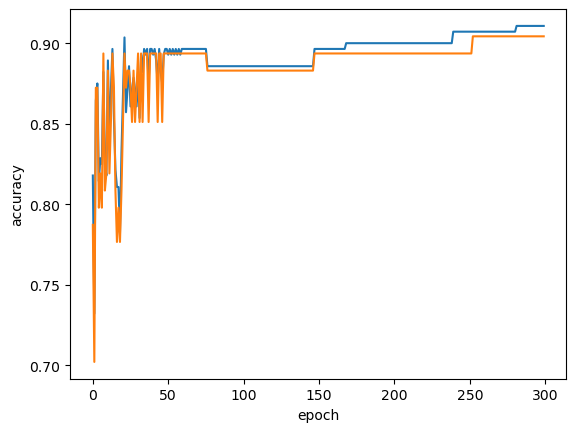

In [38]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [39]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter= 70, random_state=42)
sc.fit(train_scaled, y_train)

print('훈련결과 : ',sc.score(train_scaled, y_train))
print('테스트결과 : ',sc.score(test_scaled, y_test))

훈련결과 :  0.875
테스트결과 :  0.9042553191489362


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<span style="background-color:#fff5b1">적정 에포크 값을 찾았을때 70쯤에서 적절하고 안정된 정확도가 보임</span> 


<hr>

### - 결정트리 (Decision Tree)

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, y_train)

print('훈련결과 : ',dt.score(train_scaled, y_train))
print('테스트결과 : ',dt.score(test_scaled, y_test))

훈련결과 :  0.9321428571428572
테스트결과 :  0.8936170212765957


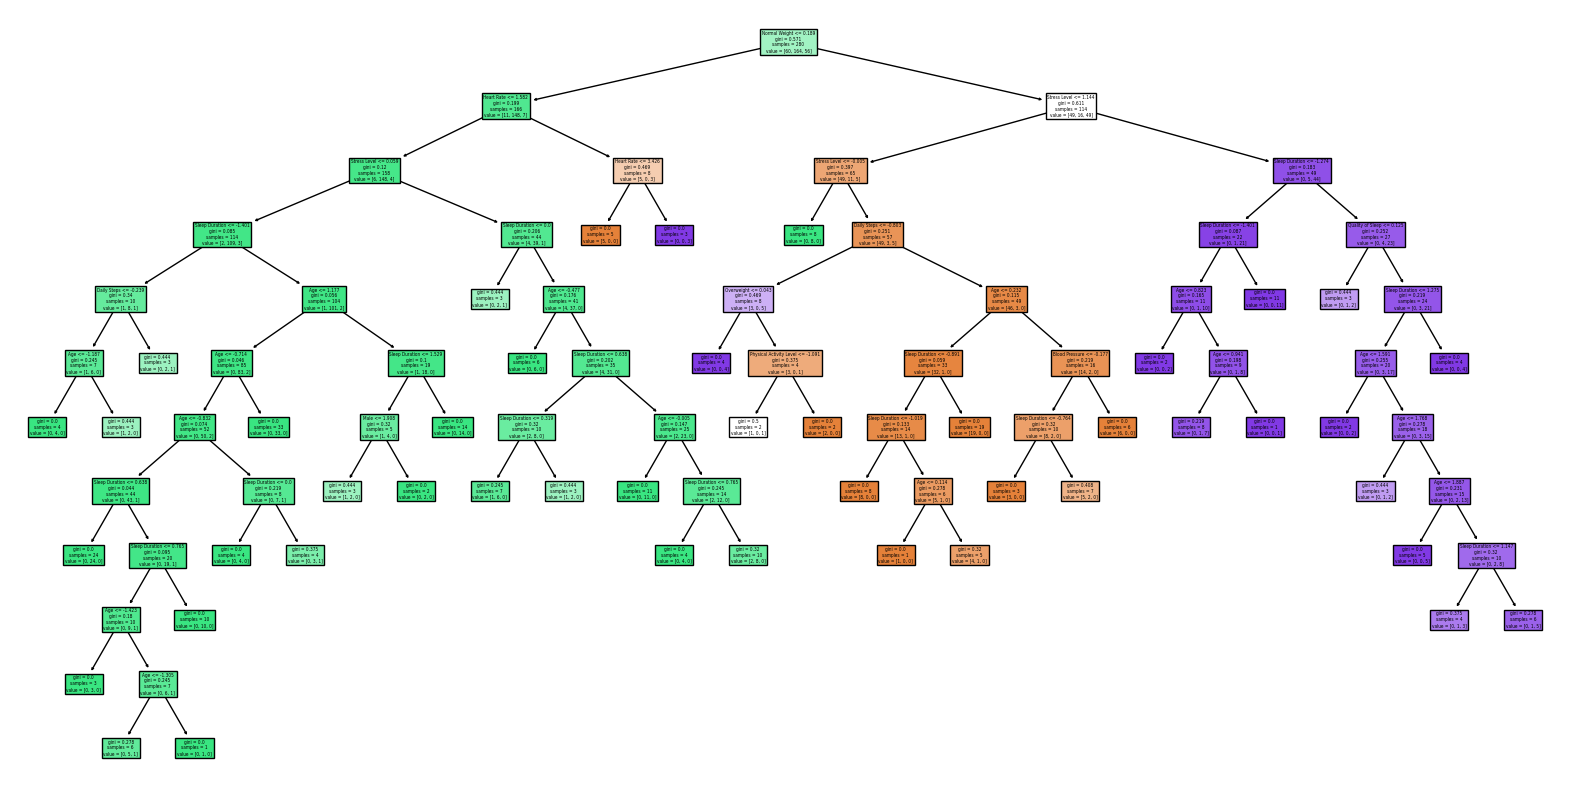

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
           'Stress Level','Blood Pressure', 'Heart Rate', 'Daily Steps', 'Female', 'Male', 
           'Normal', 'Normal Weight', 'Obese', 'Overweight'])
plt.show()

In [42]:
# 가지치기

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, y_train)

print('훈련결과 : ',dt.score(train_scaled, y_train))
print('테스트결과 : ',dt.score(test_scaled, y_test))

훈련결과 :  0.9178571428571428
테스트결과 :  0.8936170212765957


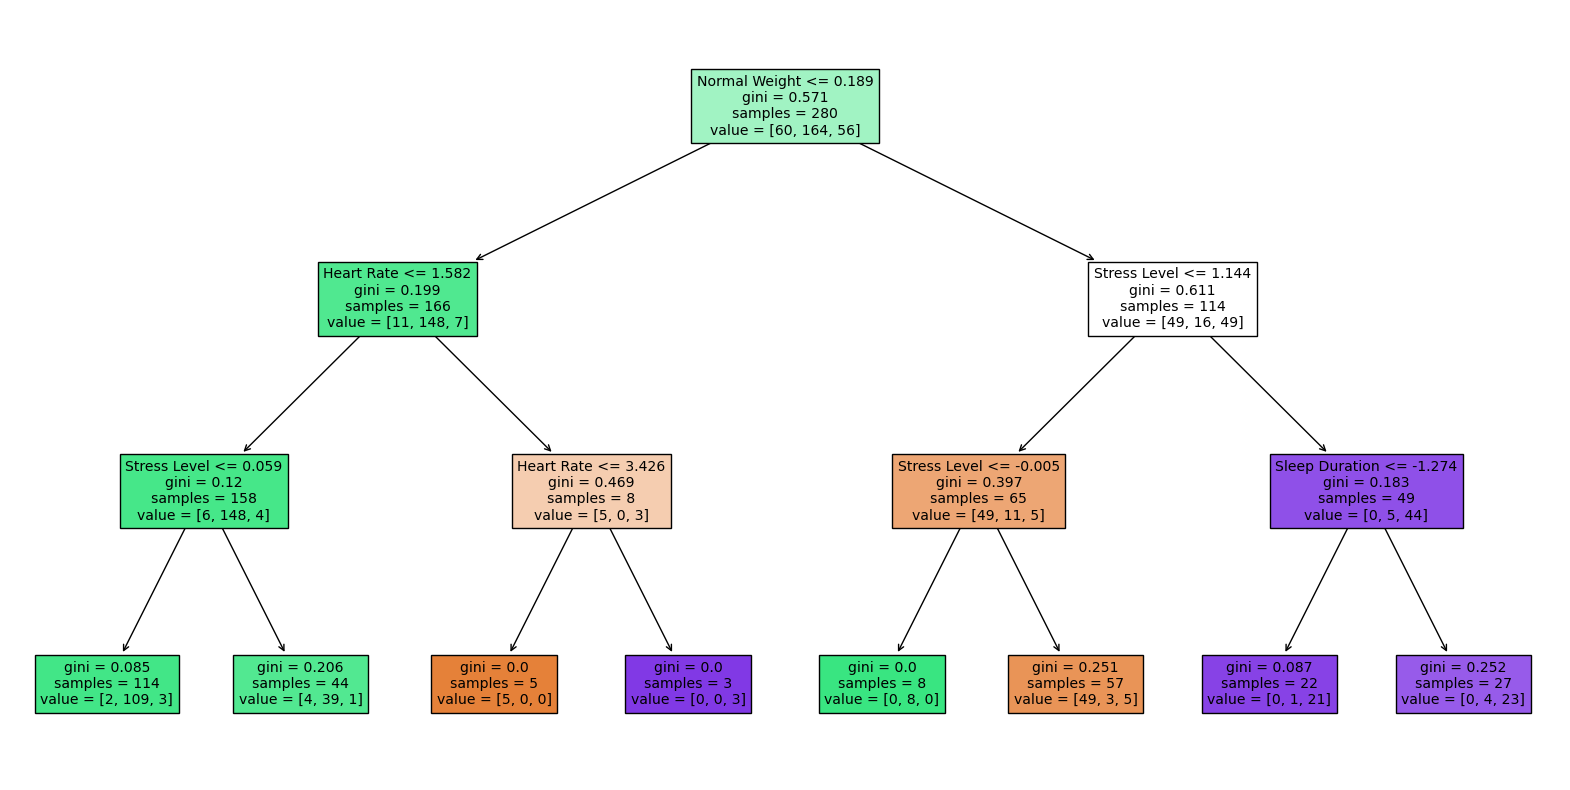

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
           'Stress Level','Blood Pressure', 'Heart Rate', 'Daily Steps', 'Female', 'Male', 
           'Normal', 'Normal Weight', 'Obese', 'Overweight'])
plt.show()

In [45]:
# 중요도 확인

In [46]:
dt.feature_importances_

array([0.        , 0.00216373, 0.        , 0.        , 0.39517255,
       0.        , 0.11835696, 0.        , 0.        , 0.        ,
       0.        , 0.48430676, 0.        , 0.        ])

In [47]:
x.columns
importance_dict = {}


for k,v in zip(x.columns,dt.feature_importances_):
    importance_dict[k] = v

importance_dict
    

{'Age': 0.0,
 'Sleep Duration': 0.002163732823302938,
 'Quality of Sleep': 0.0,
 'Physical Activity Level': 0.0,
 'Blood Pressure': 0.3951725454223383,
 'Stress Level': 0.0,
 'Heart Rate': 0.11835695831304467,
 'Daily Steps': 0.0,
 'Normal': 0.0,
 'Normal Weight': 0.0,
 'Obese': 0.0,
 'Overweight': 0.48430676344131407,
 'Female': 0.0,
 'Male': 0.0}

<span style="background-color:#fff5b1">Blood Pressure과 BMI-Overweight가 영향을 많이 주는걸 알 수 있다</span>

In [48]:
# 교차검증 진행

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42) 

In [50]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, x_train, y_train, cv=7)
scores

{'fit_time': array([0.00296211, 0.00099754, 0.00099683, 0.00100017, 0.00099444,
        0.00199747, 0.00202394]),
 'score_time': array([0.0010376 , 0.00201941, 0.00097275, 0.00096726, 0.00102758,
        0.00096464, 0.00099683]),
 'test_score': array([0.75 , 0.825, 0.85 , 0.975, 0.925, 0.875, 0.925])}

In [51]:
import numpy as np

np.mean(scores['test_score'])

0.875

In [52]:
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(dt, x_train, y_train, cv=splitter)
np.mean(scores['test_score'])

0.875

<hr>

### - 앙상블

In [53]:
# 랜덤포레스트

In [54]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier 
import numpy as np

rf = RandomForestClassifier(random_state=42)
scores = cross_validate(rf, x_train, y_train, return_train_score=True)

print('훈련결과 : ',np.mean(scores['train_score']))
print('테스트결과 : ',np.mean(scores['test_score']))

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

훈련결과 :  0.9339285714285713
테스트결과 :  0.9035714285714287


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [55]:
# 랜덤포레스트 - 중요도확인

In [56]:
rf.fit(x_train, y_train)
rf.feature_importances_

C:\Users\user\AppData\Local\Temp\ipykernel_7776\1548868126.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


array([0.12729903, 0.13673091, 0.04024996, 0.06903316, 0.16915867,
       0.06340418, 0.04503369, 0.08313286, 0.07202195, 0.00865455,
       0.00675886, 0.16041418, 0.00696145, 0.01114655])

In [57]:
x.columns
importance_dict = {}


for k,v in zip(x.columns,rf.feature_importances_):
    importance_dict[k] = v

importance_dict

{'Age': 0.1272990256659677,
 'Sleep Duration': 0.13673090809732363,
 'Quality of Sleep': 0.040249963122127475,
 'Physical Activity Level': 0.06903316214133476,
 'Blood Pressure': 0.16915866869070031,
 'Stress Level': 0.06340418214681558,
 'Heart Rate': 0.04503369226125916,
 'Daily Steps': 0.08313285641871201,
 'Normal': 0.0720219500303864,
 'Normal Weight': 0.008654546896352106,
 'Obese': 0.006758862651197542,
 'Overweight': 0.1604141775879868,
 'Female': 0.006961449598102191,
 'Male': 0.01114655469173447}

In [58]:
# 엑스트라트리

In [59]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, x_train, y_train, return_train_score=True, n_jobs=-1)

print('훈련결과 : ',np.mean(scores['train_score']))
print('테스트결과 : ',np.mean(scores['test_score']))

훈련결과 :  0.9339285714285713
테스트결과 :  0.8714285714285716


In [60]:
# 엑스트라트리 - 중요도확인

In [61]:
et.fit(x_train, y_train)
et.feature_importances_

C:\Users\user\AppData\Local\Temp\ipykernel_7776\608460906.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et.fit(x_train, y_train)


array([0.06186214, 0.08487499, 0.06112986, 0.09589573, 0.14244832,
       0.0561977 , 0.05040177, 0.06218801, 0.14191669, 0.0139749 ,
       0.01095245, 0.17109452, 0.02173969, 0.02532323])

In [62]:
x.columns
importance_dict = {}


for k,v in zip(x.columns,et.feature_importances_):
    importance_dict[k] = v

importance_dict

{'Age': 0.06186213684596182,
 'Sleep Duration': 0.08487498639099696,
 'Quality of Sleep': 0.06112986268390079,
 'Physical Activity Level': 0.09589573087902029,
 'Blood Pressure': 0.1424483152826055,
 'Stress Level': 0.05619769646292043,
 'Heart Rate': 0.0504017689243472,
 'Daily Steps': 0.062188014614257055,
 'Normal': 0.14191669094876402,
 'Normal Weight': 0.0139749004985097,
 'Obese': 0.010952452816240093,
 'Overweight': 0.17109452030005368,
 'Female': 0.02173968915247904,
 'Male': 0.025323234199943524}

In [63]:
# 그레이디언트부스팅

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, x_train, y_train, return_train_score=True, n_jobs=-1)

print('훈련결과 : ',np.mean(scores['train_score']))
print('테스트결과 : ',np.mean(scores['test_score']))

훈련결과 :  0.9339285714285713
테스트결과 :  0.8964285714285714


In [65]:
# 그레이디언트부스팅-중요도확인

In [66]:
gb.fit(x_train, y_train)
gb.feature_importances_

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2.40731779e-02, 3.40429751e-02, 3.93476130e-03, 1.19669476e-01,
       4.39150773e-01, 1.10828578e-02, 4.88758707e-02, 4.85200460e-02,
       5.87639200e-03, 3.73742492e-05, 1.41165992e-05, 2.60246759e-01,
       1.83769702e-03, 2.63772292e-03])

In [67]:
x.columns
importance_dict = {}


for k,v in zip(x.columns,gb.feature_importances_):
    importance_dict[k] = v

importance_dict

{'Age': 0.024073177886811233,
 'Sleep Duration': 0.034042975059141264,
 'Quality of Sleep': 0.003934761301984339,
 'Physical Activity Level': 0.11966947565067984,
 'Blood Pressure': 0.4391507734917456,
 'Stress Level': 0.011082857802705372,
 'Heart Rate': 0.04887587071589089,
 'Daily Steps': 0.048520046041348935,
 'Normal': 0.005876392004413457,
 'Normal Weight': 3.737424918720336e-05,
 'Obese': 1.4116599163000842e-05,
 'Overweight': 0.26024675926143215,
 'Female': 0.001837697015784592,
 'Male': 0.0026377229197121262}

In [69]:
# 히스토그램 기반 그레이디언트부스팅

In [70]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, x_train, y_train, return_train_score=True, n_jobs=-1)

print('훈련결과 : ',np.mean(scores['train_score']))
print('테스트결과 : ',np.mean(scores['test_score']))

훈련결과 :  0.9339285714285713
테스트결과 :  0.8964285714285714


<span style="background-color:#fff5b1">결정트리, 랜덤포레스트, 엑스트라트리, 그레이디언트부스팅에서 전반적으로 Blood Pressure와 BMI가 영향을 많이 주는걸 알 수 있다</span>

<hr>

### 결과
- KNN회귀  
    훈련결과 :  0.9071428571428571  
    테스트결과 :  0.8829787234042553  
  - scale 적용  
    훈련결과 :  0.9142857142857143  
    테스트결과 :  0.8829787234042553  
<br>
<br>
- 선형회귀  
    훈련결과 :  0.593022669236782  
    테스트결과 :  0.5879419739363988  
  - scale 적용  
    훈련결과 :  0.4902844825867082  
    테스트결과 :  0.36567980390806487  
<br>
<br>
- 로지스틱회귀
    훈련결과 : 0.8964285714285715  
    테스트결과 : 0.8936170212765957  
  - scale 적용  
    훈련결과 : 0.9214285714285714  
    테스트결과 : 0.9148936170212766  
<br>
<br>
- 확률적 경사 하강법  
    훈련결과 : 0.9071428571428571  
    테스트결과 : 0.9148936170212766  
  - 70회반복  
    훈련결과 : 0.875  
    테스트결과 : 0.9042553191489362  
<br>
<br>
- 결정트리  
    훈련결과 : 0.9321428571428572  
    테스트결과 : 0.8936170212765957  
<br>
<br>
- 랜덤포레스트  
    훈련결과 : 0.9339285714285713  
    테스트결과 : 0.9035714285714287  
<br>
<br>
- 엑스트라트리  
    훈련결과 : 0.9339285714285713  
    테스트결과 : 0.8714285714285716  
<br>
<br>
- 그레이디언트부스팅  
    훈련결과 : 0.9339285714285713  
    테스트결과 : 0.8964285714285714  
<br>
<br>
- 히스토그램기반 그레이디언트부스팅  
    훈련결과 : 0.9339285714285713  
    테스트결과 : 0.8964285714285714  

<span style="background-color:#fff5b1">분류모델을 적용한 것이 점수가 적절하다</span>